<a href="https://www.kaggle.com/code/suyashkapil/virat-kohli-hundreds?scriptVersionId=154181256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

* Last Update: 8 December 2023

![Virat Kohli](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7QAwECDUKXzFUAa_sqeF3CkSSx7n9gq6LPg&usqp=CAU)

# **His first 10 hundreds**

In [2]:
vk = pd.read_csv('/kaggle/input/virat-kohli-100s/Virat_Kohli_100s.csv')
vk.head(10)

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
0,1,ODI,2,4,107,114,93.859649,Sri Lanka,Kolkata,India,Bilateral,2009,316,3,No,No,Yes,No
1,2,ODI,2,3,102,95,107.368421,Bangladesh,Mirpur,Bangladesh,Tri-Series,2010,249,4,Yes,Yes,Yes,No
2,3,ODI,2,3,118,121,97.520661,Australia,Vizag,India,Bilateral,2010,292,5,No,Yes,Yes,No
3,4,ODI,1,3,105,104,100.961539,New Zealand,Guwahati,India,Bilateral,2010,276,10,No,Yes,Yes,No
4,5,ODI,1,4,100,83,120.481928,Bangladesh,Mirpur,Bangladesh,World Cup,2011,370,4,Yes,No,Yes,No
5,6,ODI,1,4,107,93,115.053763,England,Cardiff,England,Bilateral,2011,304,6,No,No,No,No
6,7,ODI,2,4,112,98,114.285714,England,Delhi,India,Bilateral,2011,238,2,Yes,Yes,Yes,No
7,8,ODI,2,4,117,123,95.121951,West Indies,Vizag,India,Bilateral,2011,270,5,No,Yes,Yes,No
8,9,Test,2,6,116,213,54.460094,Australia,Adelaide,Australia,Bilateral,2012,272,10,No,No,No,No
9,10,ODI,2,4,133,86,154.651163,Sri Lanka,Hobart,Australia,Tri-Series,2012,320,4,Yes,Yes,Yes,No


* Kohli had 9 ODI hundreds out of his first 10 international tons.
* 5 of the first 10 were hit at home while 2 each were hit at Australia and Bangladesh.
* All of these ODI tons resulted in a win for India except the sixth ton(107 vs England at Cardiff,England in 2011)
* His first test ton was at Adelaide, Australia in 2012.
* His first World Cup ton was hit in Bangladesh against Bangladesh.
* He won 6 Man Of The Match awards for these 10 tons.
* 6 out of his 9 ODI hundreds were hit chasing a target.

# **His hundreds year-wise**

Year
2009     1
2010     3
2011     4
2012     8
2013     6
2014     8
2015     4
2016    11
2017    11
2018    11
2019     8
2022     2
2023    10
Name: Number, dtype: int64


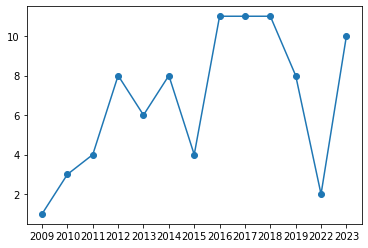

In [3]:
vk_year = vk.groupby('Year')
print(vk_year.count()['Number'])
year_tons = np.array(vk_year.count()['Number'])
year = np.array(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2022','2023'])
plt.plot(year,year_tons,'-o')

* Highest number of tons were hit by him in 2016,2017 and 2018 (11 each) followed by 10 in 2023.
* 8 each were hit in 2012,2014 and 2019
* He didn't hit any hundred in 2020 and 2021.

# **Hundreds in each format**

In [4]:
vk_for = vk.groupby('Format')
print(vk_for.count()['Number'])
vk_format = np.array(vk_for.count()['Number'])
for_perc = np.array((vk_format/vk_format.sum())*100)
format = np.array(['ODI','T20','T20i','Test'])
px.pie(vk_format , values = vk_format , names = format , title = 'Format-wise centuries',hole=0.5)

Format
ODI     50
T20      7
T20i     1
Test    29
Name: Number, dtype: int64


* 57.5 % of his Hundreds were hit in ODIs followed distantly by tests(33.3%).
* He has only 1 ton in T20i while he has 7 in the IPL in double the matches(4 in 2016).

# **Favorite opponent ?**

In [5]:
vk_opp = vk.groupby('Against')
vk_oppo = vk_opp.count()['Number']
vko = pd.DataFrame(vk_oppo)
vko

,Number
Against,
Afghanistan,1
Australia,16
Bangladesh,7
England,8
Gujarat Lions,2
Gujarat Titans,1
Kings XI Punjab,1
Kolkata Knight Riders,1
New Zealand,9


* He has highest number of tons against Australia(16) followed by Sri Lanka(15).
* He has 41 Hundreds against SENA countries out his 80 international hundreds.
* He has 2 tons against Gujarat Lions,his highest against a team in IPL.
* He has 3 tons against Pakistan(183,122* and 107). Two in Asia Cup, one in World Cup.
* His ton against Afghanistan is his only t20i ton.

In [6]:
print('Hundreds against each nation in ODIs :')
vk[(vk.Format == 'ODI')].groupby('Against').count()['Number'].sort_values(ascending=False)

Hundreds against each nation in ODIs :


Against
Sri Lanka       10
West Indies      9
Australia        8
New Zealand      6
Bangladesh       5
South Africa     5
England          3
Pakistan         3
Zimbabwe         1
Name: Number, dtype: int64

* He is the only Indian to hit 10 or more hundreds against a nation in ODIs(10 against Sri Lanka).
* He has 22 out of his 50 ODI hundreds against SENA countries.

In [7]:
print('Hundreds against each nation in Tests')
vk[(vk.Format == 'Test')].groupby('Against').count()['Number'].sort_values(ascending=False)

Hundreds against each nation in Tests


Against
Australia       8
England         5
Sri Lanka       5
New Zealand     3
South Africa    3
West Indies     3
Bangladesh      2
Name: Number, dtype: int64

* His 9 out of 12 hundreds against West Indies are in ODIs.
* England is the only team against which he has hit more hundreds in tests than ODIs(5 and 3 respectively).
* He has 19 out of his 29 Test hundreds against SENA countries.

# **How many as captain?**

Captain
No     41
Yes    46
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7eb6b0afaf10>,
 [Text(0.09916840808672953, 1.0955207103645024, 'No'),
  Text(-0.0991684080867294, -1.0955207103645024, 'Yes')],
 [Text(0.05409185895639792, 0.5975567511079104, '47.1%'),
  Text(-0.05409185895639785, -0.5975567511079104, '52.9%')])

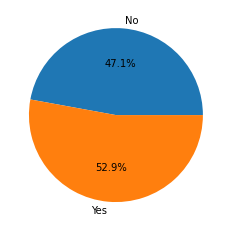

In [8]:
vk_cap = vk.groupby('Captain')
vkc=vk_cap.count()['Number']
print(vkc)
vkc_perc = vkc*50
plt.pie(vkc_perc,labels = ['No','Yes'], autopct='%1.1f%%')

* He has hit 53% of his hundreds across all formats as a captain.
* 5 out of his 7 IPL hundreds were made by him as a captain

# **How many Man Of The Match awards for his hundreds?**

MOTM
No     36
Yes    51
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7eb6b0ae1d90>,
 [Text(0.29428112789727806, 1.0599050041223061, 'No'),
  Text(-0.29428102866180883, -1.059905031674889, 'Yes')],
 [Text(0.16051697885306074, 0.5781300022485306, '41%'),
  Text(-0.16051692472462298, -0.5781300172772121, '59%')])

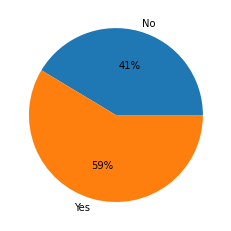

In [9]:
vk_motm = vk.groupby('MOTM').count()['Number']
print(vk_motm)
motm_perc = vk_motm*50
plt.pie(motm_perc,labels=['No','Yes'], autopct='%0.0f%%')

* Won Man Of The Match awards 59% of the times he made a ton

# **Favorite position to bat?**

Position
3       43
4       32
5        3
6        1
Open     8
Name: Number, dtype: int64


<BarContainer object of 5 artists>

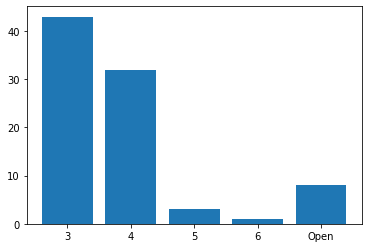

In [10]:
vk_pos = vk.groupby('Position')
pos = vk_pos.count()
print(pos['Number'])
plt.bar(['3','4','5','6','Open'],height = pos['Number'])

* All 8 of his t20 tons came when he played as an opener
* He bats usually at 4 in tests and 3 in ODIs. Initially, he batted lower the order.
* His first test ton was hit by him batting at number 6.
* He has hit 43 ODI tons batting at no.3 while 7 ODI tons at 4. He has 25 tons in tests batting at no.4 while 3 and 1 at no.5 and no.6 respectively.

# **Average Strike Rate of these Hundreds across the formats**

        Strike Rate
Format             
ODI      112.918002
T20      180.833799
T20i     200.000000
Test      64.985614


<BarContainer object of 4 artists>

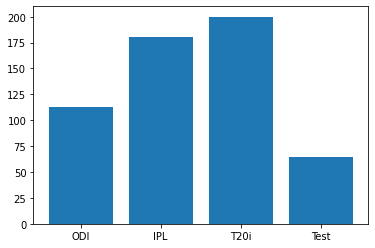

In [11]:
vk_sr = vk_for.mean()['Strike Rate']
print(pd.DataFrame(vk_sr))
plt.bar(['ODI','IPL','T20i','Test'],height= vk_for.mean()['Strike Rate'])

* His Hundreds were hit at really great pace across the formats.

# **How large are these tons?**

Format
ODI     120.600000
T20     104.428571
T20i    122.000000
Test    150.758621
Name: Score, dtype: float64


<BarContainer object of 4 artists>

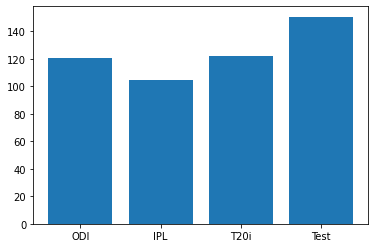

In [12]:
vk_sco=vk_for.mean()['Score']
print(vk_sco)
plt.bar(['ODI','IPL','T20i','Test'],height=vk_sco)

* He hits huge tons in tests with an average score of 151!
* The average score in tests is also skewed so high by his 7 double tons.
* His only hundred in t20i is 122 not out. Hence, his average score in t20i hundreds is 122.
* His IPL tons are 100,100,108,109,113,101,100.Hence, average is 104.

# **How many balls does he face for a ton on average?**

Format
ODI     109.260000
T20      58.285714
T20i     61.000000
Test    234.896552
Name: Balls, dtype: float64


<BarContainer object of 4 artists>

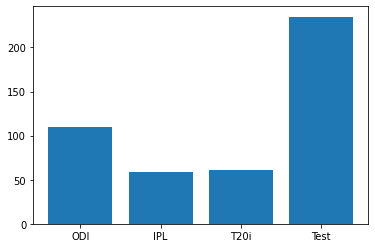

In [13]:
vk_ball = vk_for.mean()['Balls']
print(vk_ball)
plt.bar(['ODI','IPL','T20i','Test'],vk_ball)

* He faces a lot of balls on an average for his tons.

# **How many result in a win**

Win
Drawn     8
No       16
Tie       1
Yes      62
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7eb6b08b3b90>,
 [Text(1.0544192425844237, 0.313368889438136, 'Drawn'),
  Text(0.4437786825214872, 1.0065090565610888, 'No'),
  Text(-0.21703367682087776, 1.0783767352486844, 'Tie'),
  Text(-0.7433382020031206, -0.9420447534182057, 'Yes')],
 [Text(0.5751377686824128, 0.17092848514807416, '9.2%'),
  Text(0.2420610995571748, 0.5490049399424121, '18.4%'),
  Text(-0.11838200553866059, 0.5882054919538278, '1.1%'),
  Text(-0.433613951168487, -0.5495261061606199, '71.3%')])

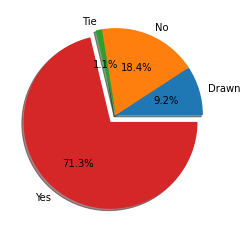

In [14]:
vk_win = vk.groupby('Win')
vkwc = vk_win.count()['Number']
print(vkwc)
vkwp = vkwc/0.77
plt.pie(vkwp,labels= ['Drawn','No','Tie','Yes'],autopct ='%0.1f%%',shadow=True,explode=[0,0,0,0.1])

* A large proportion of them(71%) have resulted in a win
* 8 out of his 29 test tons resulted in a draw.
* Out of his 87 tons, only 1 has resulted in a tie (it was against West Indies at Vizag in ODI (2018))

# **Highest Scores across formats**

Format
ODI     183
T20     113
T20i    122
Test    254
Name: Score, dtype: int64


<BarContainer object of 4 artists>

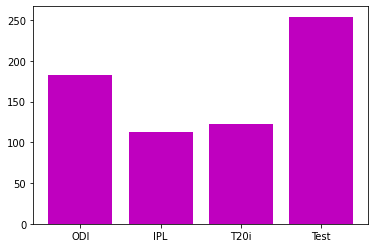

In [15]:
print(vk_for.max()['Score'])
plt.bar(['ODI','IPL','T20i','Test'],height=vk_for.max()['Score'],color='m')

* His ODI high score is 183 against Pakistan in 2012 Asia Cup chasing 330 which India eventually won by 6 wickets.
* His T20i high score too was in Asia Cup (122 not out against Afghanistan,2022) posting a target of 213 for Afghanistan and winning it by 101 runs.
* His IPL high score was 113 against Kings XI Punjab in 2016. The match was of 15 overs due to rain and RCB posted a target of 212 for KXIP to chase in 15 overs. RCB won by 82 runs after KXIP scored 120/9 in 14 overs before being again interrupted by rain.
* His 254 not out against South Africa in 2019 at Pune is the highest ever score by an Indian Captain in tests (followed by his 243,235 and MS Dhoni's 224)

# **ODI Chasemaster**

In ODIs :
          Inning  Number
1  Batting first      23
2        Chasing      27


([<matplotlib.patches.Wedge at 0x7eb6b073e190>,
 [Text(0.13786652831108215, 1.0913261750601648, 'Batting first'),
  Text(-0.13786642613375127, -1.0913261879681562, 'Chasing')],
 [Text(0.07519992453331752, 0.5952688227600899, '46.0%'),
  Text(-0.07519986880022796, -0.5952688298008123, '54.0%')])

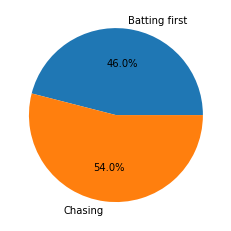

In [16]:
odi_ch = vk[(vk.Format=='ODI')&(vk.Inning==2)].count()['Number']
odi_fi = vk[(vk.Format=='ODI')&(vk.Inning==1)].count()['Number']
print('In ODIs :')
vk_in = pd.DataFrame({'Inning':['Batting first','Chasing'],'Number':[odi_fi,odi_ch]},index=[1,2])
print(vk_in)
plt.pie(vk_in['Number'],labels=vk_in['Inning'],autopct='%0.1f%%')

* 54% of his 100s in ODI are while chasing (includes his high score 183)

# **Favorite Nation to play in?**

              Number  Percentage
Host Nation                     
Australia         11   14.285714
Bangladesh         6    7.792208
England            3    3.896104
India             43   55.844156
New Zealand        4    5.194805
South Africa       5    6.493506
Sri Lanka          7    9.090909
UAE                1    1.298701
West Indies        6    7.792208
Zimbabwe           1    1.298701


([<matplotlib.patches.Wedge at 0x7eb6b0711b50>,
 [Text(1.0143570502680253, 0.4255346925593154, 'AUS'),
  Text(0.5840336018513487, 0.9321506058081711, 'BAN'),
  Text(0.2558241814152584, 1.0698383000263232, 'ENG'),
  Text(-1.0885451645903406, 0.15833327081503978, 'IND'),
  Text(-0.019859634895336233, -1.0998207103441107, 'NZ'),
  Text(0.3323543884314983, -1.0485897961025201, 'SA'),
  Text(0.7419281091445254, -0.8121223312169352, 'SL'),
  Text(0.9425428683803706, -0.5671092851164612, 'UAE'),
  Text(1.0544192279145659, -0.3133689387990626, 'WI'),
  Text(1.0992829030749023, -0.03971270586619991, 'ZIM')])

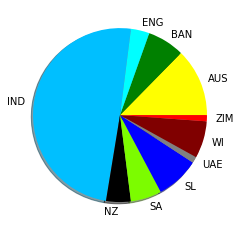

In [17]:
vk_gro = pd.DataFrame(vk.groupby('Host Nation').count()['Number'])
vkgp = vk_gro['Number']/0.77
vk_gro['Percentage']=vkgp
print(vk_gro)
nat_abr = ['AUS','BAN','ENG','IND','NZ','SA','SL','UAE','WI','ZIM']
colors=['yellow','g','cyan','deepskyblue','black','lawngreen','blue','grey','maroon','red']
plt.pie(vk_gro['Number'],labels=nat_abr,colors=colors,shadow=True)

* He has 23 hundreds in SENA countries(SA,ENG,NZ,AUS)
* He has hit 45% of his tons outside India
* He has never played a match in Pakistan
* Apart from India, he has hit most tons in Australia(5 in Adelaide,Australia)

# **Favorite City**

In [18]:
vk_ven = vk.groupby('Venue').count()['Number'].sort_values(ascending=False)
print(vk_ven)

Venue
Adelaide              5
Bengaluru             5
Kolkata               5
Colombo               4
Mirpur                4
Nagpur                4
Pune                  4
Port Of Spain         4
Vizag                 4
Guwahati              3
Mumbai                3
Galle                 2
Hyderabad             2
Chennai               2
Rajkot                2
Ranchi                2
Delhi                 2
Centurion             2
Melbourne             2
Nottingham            1
Perth                 1
Sydney                1
North Sound           1
Napier                1
Thiruvananthapuram    1
Mohali                1
Indore                1
Kingston              1
Kanpur                1
Birmingham            1
Canberra              1
Cape Town             1
Cardiff               1
Chattogram            1
Dharamshala           1
Dubai                 1
Durban                1
Fatullah              1
Hambantota            1
Harare                1
Hobart                1
Ahmedabad 

* 4 of his 7 IPL tons were hit at Chinnaswamy Stadium,Bengaluru.
* His World Cup Hundreds were hit at Mirpur(100* vs Bangladesh in 2011) ,Adelaide(107 vs Pakistan in 2015), Pune(103* vs Bangladesh in 2023), Kolkata(101* vs South Africa in 2023) and Mumbai(117 vs New Zealand in World Cup 2023 Semi-Final).
* His ODI high score was hit at Mirpur,Bangladesh(183 vs Pakistan in Asia Cup 2012) while his Test high score was hit at Pune,India(254 not out against South Africa in 2019)

# **Series He made his tons in**

Series
Asia Cup       5
Bilateral     67
IPL            7
Tri-Series     3
World Cup      5
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7eb6b06b2810>,
 [Text(1.0821193284580624, 0.19752913450291884, 'Asia Cup'),
  Text(-1.0290586382343476, 0.3886364870611997, 'Bilateral'),
  Text(0.741928242208181, -0.8121222096543593, 'IPL'),
  Text(0.9810072920452209, -0.49761902390694723, 'Tri-Series'),
  Text(1.0821193515755705, -0.19752900785876304, 'World Cup')],
 [Text(0.5902469064316703, 0.10774316427431936, '5.7%'),
  Text(-0.5613047117641896, 0.21198353839701797, '77.0%'),
  Text(0.4046881321135532, -0.44297575072055956, '8.0%'),
  Text(0.5350948865701204, -0.27142855849469844, '3.4%'),
  Text(0.5902469190412202, -0.10774309519568892, '5.7%')])

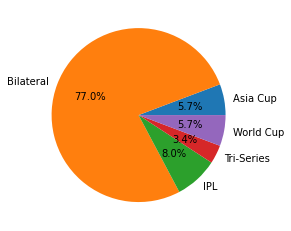

In [19]:
vk_ser = vk.groupby('Series').count()['Number']
print(vk_ser)
plt.pie(vk_ser,labels=vk_ser.index,autopct='%0.1f%%')

* He hasn't hit a 100 in Champions Trophy(highest 96 not out vs Bangladesh in 2017 semi-final) and T20 World Cup(highest 89 not out against West Indies in 2016 semi-final)
* A whopping 77% of his tons were hit in Bilaterals followed by 8% in IPL and 5.7% in both Asia Cup as well as World Cup.
* All test hundreds were hit in Bilaterals. He has played only 2 tests besides Bilaterals( World Test Championship 2021 and 2023 Finals)

# **Double Hundreds**

In [20]:
vk_200 = vk[vk.Score >= 200]
vk_200

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
40,41,Test,1,4,200,283,70.671378,West Indies,North Sound,West Indies,Bilateral,2016,566,8,No,No,Yes,Yes
41,42,Test,1,4,211,366,57.650273,New Zealand,Indore,India,Bilateral,2016,557,5,No,No,Yes,Yes
44,45,Test,2,4,235,340,69.117647,England,Mumbai,India,Bilateral,2016,631,10,No,Yes,Yes,Yes
46,47,Test,1,4,204,246,82.926829,Bangladesh,Hyderabad,India,Bilateral,2017,687,6,No,Yes,Yes,Yes
54,55,Test,2,4,213,267,79.775281,Sri Lanka,Nagpur,India,Bilateral,2017,610,6,No,Yes,Yes,Yes
55,56,Test,1,4,243,287,84.668990,Sri Lanka,Delhi,India,Bilateral,2017,536,7,No,Yes,Drawn,Yes
73,74,Test,1,4,254,336,75.595238,South Africa,Pune,India,Bilateral,2019,601,5,Yes,Yes,Yes,Yes


In [21]:
print('All of his 200s were hit in test matches')
print('Average Strike Rate when he hits a Double Ton :{}'.format(np.mean(vk_200['Strike Rate'])))

All of his 200s were hit in test matches
Average Strike Rate when he hits a Double Ton :74.34366231285715


Against
Bangladesh      1
England         1
New Zealand     1
South Africa    1
Sri Lanka       2
West Indies     1
Name: Number, dtype: int64


([<matplotlib.patches.Wedge at 0x7eb6b0621f90>,
 [Text(0.9910657451172095, 0.47727213291294374, 'Bangladesh'),
  Text(0.24477296280441296, 1.0724207181325571, 'England'),
  Text(-0.68583886831644, 0.8600145619153347, 'New Zealand'),
  Text(-1.0999999999999892, -1.5448414893833034e-07, 'South Africa'),
  Text(-0.24477281219349967, -1.0724207525084946, 'Sri Lanka'),
  Text(0.9910658791734962, -0.47727185454211024, 'West Indies')],
 [Text(0.5405813155184778, 0.2603302543161511, '14%'),
  Text(0.13351252516604342, 0.5849567553450311, '14%'),
  Text(-0.3740939281726036, 0.46909885195381884, '14%'),
  Text(-0.5999999999999941, -8.426408123908927e-08, '14%'),
  Text(-0.13351244301463616, -0.5849567740955425, '29%'),
  Text(0.5405813886400888, -0.26033010247751465, '14%')])

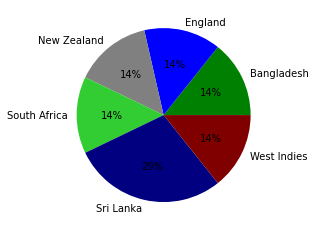

In [22]:
vk200_opp = vk_200.groupby('Against').count()['Number']
print(vk200_opp)
plt.pie(vk200_opp,labels=vk200_opp.index,colors=['g','b','gray','limegreen','navy','maroon'],autopct='%0.0f%%')

In [23]:
print(vk_200.groupby('Win').count()['Number'])
print(vk_200.groupby('Captain').count()['Number'])
print(vk_200.groupby('MOTM').count()['Number'])
print(vk_200.groupby('Not Out').count()['Number'])
print(vk_200.groupby('Host Nation').count()['Number'])

Win
Drawn    1
Yes      6
Name: Number, dtype: int64
Captain
Yes    7
Name: Number, dtype: int64
MOTM
No     2
Yes    5
Name: Number, dtype: int64
Not Out
No     6
Yes    1
Name: Number, dtype: int64
Host Nation
India          6
West Indies    1
Name: Number, dtype: int64


* Kohli had hit two consecutive 200s against Sri Lanka as a captain in 2017.
* India has never lost a test match when Kohli made a 200.
* All his 200s were hit when he was the captain of the team.
* His 254 against South Africa is the only 200 when he didn't get out.
* He was awarded Man Of The Match award for 5 of his 7 double tons.
* His first 200 came away from home. 6 of his 7 double tons were hit at home.
* His 2nd 200 was hit next to his first 200 (they were his 42nd and 41st ton respectively) but they weren't consecutive.


# **Top 10 high scores in ODIs**

In [24]:
vk_hi = vk[(vk.Format=='ODI')].sort_values(by=['Score'],ascending=False).head(10)
vk_hi

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
11,12,ODI,2,3,183,148,123.648649,Pakistan,Mirpur,Bangladesh,Asia Cup,2012,330,4,No,Yes,Yes,No
78,79,ODI,1,3,166,110,150.909091,Sri Lanka,Thiruvananthapuram,India,Bilateral,2023,390,5,Yes,Yes,Yes,No
58,59,ODI,1,3,160,159,100.628931,South Africa,Cape Town,South Africa,Bilateral,2018,303,6,Yes,Yes,Yes,Yes
64,65,ODI,1,3,157,129,121.705426,West Indies,Vizag,India,Bilateral,2018,321,6,Yes,Yes,Tie,Yes
42,43,ODI,2,3,154,134,114.925373,New Zealand,Mohali,India,Bilateral,2016,289,3,Yes,Yes,Yes,No
63,64,ODI,2,3,140,107,130.841122,West Indies,Guwahati,India,Bilateral,2018,326,2,No,Yes,Yes,Yes
26,27,ODI,2,4,139,126,110.317460,Sri Lanka,Ranchi,India,Bilateral,2014,288,3,Yes,No,Yes,Yes
33,34,ODI,1,3,138,140,98.571429,South Africa,Chennai,India,Bilateral,2015,299,8,No,Yes,Yes,No
24,25,ODI,2,3,136,122,111.475410,Bangladesh,Fatullah,Bangladesh,Asia Cup,2014,280,4,No,Yes,Yes,Yes
9,10,ODI,2,4,133,86,154.651163,Sri Lanka,Hobart,Australia,Tri-Series,2012,320,4,Yes,Yes,Yes,No


* India registered the biggest win in ODIs when Kohli made 166 not out on 15 January 2023. India won the match against Sri Lanka by 317 runs (Sri Lanka 73/9 (1 retired hurt) in 22 overs).

Inning
1    4
2    6
Name: Number, dtype: int64
Host Nation
Australia       1
Bangladesh      2
India           6
South Africa    1
Name: Number, dtype: int64


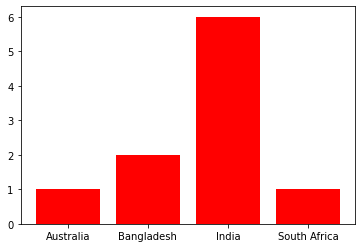

In [25]:
vk_hi_in = vk_hi.groupby('Inning').count()['Number']
print(vk_hi_in)
vk_hi_ven = vk_hi.groupby('Host Nation').count()['Number']
print(vk_hi_ven)
plt.bar(x=vk_hi_ven.index,height=vk_hi_ven,color='r')
vk_hi_opp =vk_hi.groupby('Against').count()['Number']

Against
Bangladesh      1
New Zealand     1
Pakistan        1
South Africa    2
Sri Lanka       3
West Indies     2
Name: Number, dtype: int64


<BarContainer object of 6 artists>

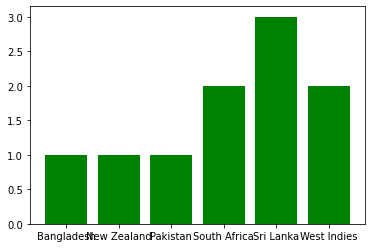

In [26]:
print(vk_hi_opp)
plt.bar(x=vk_hi_opp.index,height=vk_hi_opp,color='g')

* 6 of his top 10 odi high scores were hit in India followed by 2 in Bangladesh.
* 6 of them were hit while chasing.
* 3 of these 10 scores are against Sri Lanka, closely followed by South Africa and West Indies( 2 each).
* 2 of these 10 were hit in SENA countries(SA,ENG,NZ,AUS).
* 9 of these 10 were hit with a strike rate above 100( strike rate 98.57 is the slowest among these, it was 138 in 140 against South Africa at Chennai).
* 5 of these 10 are scores of 150+.
* 9 of these 10 came in winning cause, 1 in tie.
* Kohli was awarded MOTM for 9 of these innings.(The only time he wasn't awarded MOTM was for his 139 against Sri Lanka. Angelo Mathews was awarded MOTM for his 139 in 116 and 2 for 33)

# Top 10 Test scores

In [27]:
test_hi = vk[vk.Format=='Test'].sort_values('Score',ascending=False).iloc[:10,:]
test_hi

,Number,Format,Inning,Position,Score,Balls,Strike Rate,Against,Venue,Host Nation,Series,Year,Team Total,Wickets lost,Not Out,MOTM,Win,Captain
73,74,Test,1,4,254,336,75.595238,South Africa,Pune,India,Bilateral,2019,601,5,Yes,Yes,Yes,Yes
55,56,Test,1,4,243,287,84.668990,Sri Lanka,Delhi,India,Bilateral,2017,536,7,No,Yes,Drawn,Yes
44,45,Test,2,4,235,340,69.117647,England,Mumbai,India,Bilateral,2016,631,10,No,Yes,Yes,Yes
54,55,Test,2,4,213,267,79.775281,Sri Lanka,Nagpur,India,Bilateral,2017,610,6,No,Yes,Yes,Yes
41,42,Test,1,4,211,366,57.650273,New Zealand,Indore,India,Bilateral,2016,557,5,No,No,Yes,Yes
46,47,Test,1,4,204,246,82.926829,Bangladesh,Hyderabad,India,Bilateral,2017,687,6,No,Yes,Yes,Yes
40,41,Test,1,4,200,283,70.671378,West Indies,North Sound,West Indies,Bilateral,2016,566,8,No,No,Yes,Yes
79,80,Test,2,4,186,364,51.098901,Australia,Ahmedabad,India,Bilateral,2023,571,9,No,Yes,Drawn,No
29,30,Test,2,4,169,272,62.132353,Australia,Melbourne,Australia,Bilateral,2014,465,10,No,No,Drawn,No
43,44,Test,1,4,167,267,62.546816,England,Vizag,India,Bilateral,2016,455,10,No,Yes,Yes,Yes


In [28]:
test_hi.groupby('Against').count()['Score']

Against
Australia       2
Bangladesh      1
England         2
New Zealand     1
South Africa    1
Sri Lanka       2
West Indies     1
Name: Score, dtype: int64

* 6 of these 10 innings are played against SENA countries
* 2 each are played against Australia,England and Sri Lanka

Host Nation
Australia      1
India          8
West Indies    1
Name: Score, dtype: int64


([<matplotlib.patches.Wedge at 0x7eb6b04aedd0>,
 [Text(1.0461621663333946, 0.3399186987098808, 'Australia'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'India'),
  Text(1.0461621981588753, -0.33991860076110864, 'West Indies')],
 [Text(0.5706339089091244, 0.1854101992962986, '10%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '80%'),
  Text(0.5706339262684774, -0.18541014586969562, '10%')])

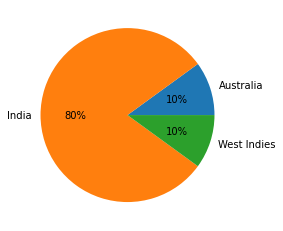

In [29]:
test_hi_venue = test_hi.groupby('Host Nation').count()['Score']
print(test_hi_venue)
plt.pie(test_hi_venue,labels=test_hi_venue.index,autopct ='%0.0f%%' )

* He has made 8 of his 10 highest test scores in India with 1 at Melbourne(Australia) and the other at North Sound (West Indies)
* 7 of these 10 scores are double centuries

# **Contribution to team total**

In [30]:
vk_perc = pd.DataFrame(vk['Score']/vk['Team Total']*100)
vk_perc.columns=['Percentage']
print(vk_perc)
print('Average percentage')
np.mean(vk_perc)

    Percentage
0    33.860759
1    40.963855
2    40.410959
3    38.043478
4    27.027027
..         ...
82   27.625571
83   34.269663
84   39.463602
85   30.981595
86   29.471033

[87 rows x 1 columns]
Average percentage


Percentage    40.423602
dtype: float64

In [31]:
vk_perc_asc = vk_perc.sort_values(by='Percentage')
vk_perc_asc

,Percentage
16,18.706294
62,21.417565
27,25.900901
4,27.027027
32,27.466667
...,...
11,55.454545
36,55.555556
75,57.547170
59,62.621359


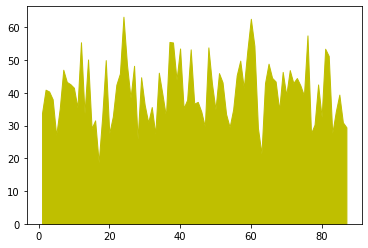

In [32]:
plt.stackplot(np.arange(1,len(vk_perc)+1,1),vk_perc['Percentage'],color='y')

In [33]:
print('Number of times he has scored a ton which contributed the majority of runs to the team total is : ')
print(vk_perc[(vk_perc.Percentage>=50)].count()[0])

Number of times he has scored a ton which contributed the majority of runs to the team total is : 
15


In [34]:
vk.iloc[16,:]

Number                 17
Format               Test
Inning                  2
Position                5
Score                 107
Balls                 206
Strike Rate     51.941748
Against         Australia
Venue             Chennai
Host Nation         India
Series          Bilateral
Year                 2013
Team Total            572
Wickets lost           10
Not Out                No
MOTM                   No
Win                   Yes
Captain                No
Name: 16, dtype: object

In [35]:
vk.iloc[23,:]

Number                   24
Format                 Test
Inning                    4
Position                  4
Score                   105
Balls                   135
Strike Rate       77.777778
Against         New Zealand
Venue            Wellington
Host Nation     New Zealand
Series            Bilateral
Year                   2014
Team Total              166
Wickets lost              3
Not Out                 Yes
MOTM                     No
Win                   Drawn
Captain                  No
Name: 23, dtype: object

* On an average across all formats, Kohli's ton makes up 41% of team score
* His 17th ton was the one with least contribution to team score(18.7%). It was against Australia at Chennai,India in a test match in 2013. His score being 107 while India raking up 572.It resulted in a win for India.
* His 24th ton was the one with highest contribution to the team total. This inning was in a 2014 test match against New Zealand at Wellington,New Zealand where he made 63% of the team runs. He contributed 105 to the total of 166 for 3. The match was drawn.
* His tons contributed more than or equal to 50% of the team total 13 times.